In [1]:
import pandas as pd

file_path = 'mobile_sale.csv'
mobile_sales_data = pd.read_csv(file_path)

mobile_sales_data_info = mobile_sales_data.info()
mobile_sales_data_head = mobile_sales_data.head()

mobile_sales_data_info, mobile_sales_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1095 non-null   float64
 1   TransactionID   1096 non-null   object 
 2   Date            1096 non-null   object 
 3   MobileModel     1096 non-null   object 
 4   Brand           1095 non-null   object 
 5   Price           1095 non-null   object 
 6   UnitsSold       1095 non-null   object 
 7   TotalRevenue    1094 non-null   float64
 8   CustomerAge     1094 non-null   float64
 9   CustomerGender  1094 non-null   object 
 10  Location        1094 non-null   object 
 11  PaymentMethod   1094 non-null   object 
dtypes: float64(3), object(9)
memory usage: 102.9+ KB


(None,
    Unnamed: 0                         TransactionID        Date MobileModel  \
 0         0.0  79397f68-61ed-4ea8-bcb2-f918d4e6c05b  2024-01-06          10   
 1         1.0  4f87d114-f522-4ead-93e3-f336402df6aa  2024-04-05          10   
 2         2.0  6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1  2024-02-13           7   
 3         3.0  7da7de95-f772-4cc2-bce0-b0873f98233e  2024-04-17         P30   
 4         4.0  469044af-0d60-4d87-af66-c6603e844057  2024-06-02      Exodus   
 
     Brand    Price UnitsSold  TotalRevenue  CustomerAge CustomerGender  \
 0   Apple  1196.95        85      28002.80         32.0         Female   
 1   Apple  1010.34        64       2378.82         55.0         Female   
 2   Nokia    400.8        95      31322.56         57.0           Male   
 3  Huawei    338.6        79      31159.75         46.0          Other   
 4     HTC   839.79        41      11523.36         38.0           Male   
 
     Location PaymentMethod  
 0     Chypre        Online  

In [2]:
geographic_distribution = mobile_sales_data.groupby('Location').agg({
    'UnitsSold': 'sum',
    'TotalRevenue': 'sum'
}).reset_index()

geographic_distribution_sorted = geographic_distribution.sort_values(by='UnitsSold', ascending=False)

geographic_distribution_sorted.head(), geographic_distribution_sorted


(               Location                                        UnitsSold  \
 48  Emirats arabes unis             989392258491368198918378378909923760   
 30             Cameroun                      976266545842369338366585335   
 64      New Jessicaberg                                               96   
 52             Finlande  95513162366885686040756479869447118811751698524   
 71        Stephaniebury                                                9   
 
     TotalRevenue  
 48     554672.91  
 30     306615.15  
 64       6875.50  
 52     713006.02  
 71      59898.14  ,
                Location                                        UnitsSold  \
 48  Emirats arabes unis             989392258491368198918378378909923760   
 30             Cameroun                      976266545842369338366585335   
 64      New Jessicaberg                                               96   
 52             Finlande  95513162366885686040756479869447118811751698524   
 71        Stephaniebury      

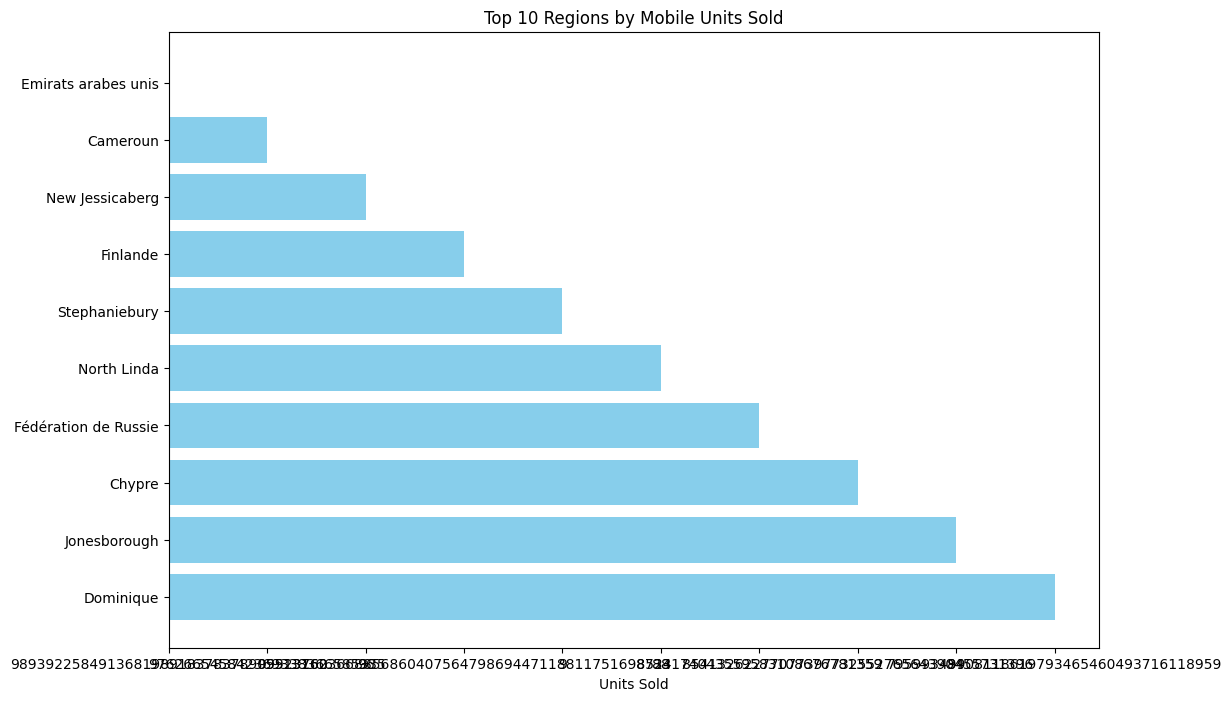

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_regions = geographic_distribution_sorted.head(10)

plt.barh(top_regions['Location'], top_regions['UnitsSold'], color='skyblue')
plt.xlabel('Units Sold')
plt.title('Top 10 Regions by Mobile Units Sold')
plt.gca().invert_yaxis() 
plt.show()


In [5]:
brand_distribution = mobile_sales_data.groupby('Brand').agg({
    'UnitsSold': 'sum',
    'TotalRevenue': 'sum'
}).reset_index()

total_units_sold = brand_distribution['UnitsSold'].sum()
total_revenue = brand_distribution['TotalRevenue'].sum()

brand_distribution['MarketShare_Units'] = (brand_distribution['UnitsSold'] / total_units_sold) * 100
brand_distribution['MarketShare_Revenue'] = (brand_distribution['TotalRevenue'] / total_revenue) * 100

brand_distribution_sorted = brand_distribution.sort_values(by='UnitsSold', ascending=False)

brand_distribution_sorted.head()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [7]:
total_revenue_by_brand = mobile_sales_data.groupby('Brand')['TotalRevenue'].sum().reset_index()

total_revenue_by_brand = total_revenue_by_brand.sort_values(by='TotalRevenue', ascending=False)

total_revenue_by_brand


,Brand,TotalRevenue
68,Research In Motion (RIM),3506732.65
28,Google,3488813.84
83,Xiaomi,3237415.74
47,LeTV,3225593.70
65,Palm,2944919.16
...,...,...
70,Rivera and Sons,1625.10
15,"Chapman, Martinez and Powers",1518.48
6,"Atkinson, Moore and Nelson",1381.82
30,"Hartman, Lopez and Riley",680.88
